This task implements and compares both the policy and value iteration versions of dynamic programming for finding an optimal policy in an MDP.

In [ ]:
# Install rl-gym-maze environment from GitHub.
!pip install gym
!git clone https://github.com/AngusMaiden/rl-gym-maze
!pip install -e ./rl-gym-maze

In [ ]:
# Run this code if using this notebook in Google Colab. Restarts the runtime after installing rl-gym-maze.
import os

def restart_runtime():
 os.kill(os.getpid(), 9)

restart_runtime()

In [1]:
# Import the necessary libraries.
import gym
import numpy as np
import matplotlib.pyplot as plt

# Invoke the model maze environment  from Task 1.2C.
env = gym.make('rl_gym_maze:rl-gym-maze-v0')

### Initialising variables

In [2]:
# Initialise environment.
env.reset()

# Initialise dictionary to store flattened index of (x,y) coordinates.
states = {}
count = 0
for i in range(10):
    for j in range(10):
        states[i, j] = count
        count+=1

# Initialise max_iterations and gamma.
max_iterations = 1000
gamma = 1

# Initialise other variables.
next_state = np.zeros([4,2])
next_reward = np.zeros(4)
next_done = np.zeros(4, dtype=bool)
next_V = np.zeros(4)

### Policy Evaluation

In [3]:
def policy_evaluation():
    
    # Initalise sweep counter.
    sweeps = 0
    
    # Policy evluation limited to 1000 sweeps (limited to save computational time).
    for i in range(max_iterations):
    
        # Initialise delta and exit variables.
        delta = 0
        exit = np.zeros(100, dtype=bool)
        
        # Initalise state.
        env.reset()
        
        # Iterate though each state.
        for x in range(10):
            for y in range(10):
                 
                # Get flattened current state.
                current_state = states[x, y]
                
                # Initalise v.
                v = 0
            
                # Loop over each action.
                for a in range(4):
                
                    # Populate a list of successor states and rewards for each eaction.
                    next_state[a], next_reward[a], next_done[a], info = env.step(a)
                    next_V[a] = states[next_state[a][0], next_state[a][1]]
                
                    # Calculate V(s) using Bellman equation:
                    v += 0.25 * (next_reward[a] + gamma * V[int(next_V[a])])
                
                    # This is a lookahead, so reset state to before the step.
                    env.location = (x,y)
            
                # Get delta value, which is the change in V(s).
                delta = max(delta, np.abs(V[current_state] - v))
            
                # Update V(s) with calculated value.
                V[current_state] = v
            
                # The state value of the terminal state is always 0.
                V[99] = 0
                
                # If the change is state value is sufficiently small, exit the loop.
                if delta < 0.1:
                    exit[current_state] = True
                
                # Update environment state to next in sweep.
                env.location = (x,y+1)
                if env.location[1] == 10:
                    env.location = (x+1, 0)
                
        # Increment episode counter and display progress indicator.
        sweeps += 1
        print(f'\rPolicy Evaluation: Sweep {sweeps}', end='')
        
        if exit.all():
            # Print the results and return the new V table.
            print(f'\r==Policy Evaluation==                 \n'
                  f'Converged in {sweeps} sweeps.\n')
            return V
    
    # Print the results and return the new V table.
    print(f'\r==Policy Evaluation==                         \n'
          f'Stopped after {sweeps} sweeps.\n')
    return V

### One step look-ahead function

In [4]:
def action_values(state):
    
    # Check that 'state' argument is a tuple, for environment compatability.
    assert isinstance(state, tuple), '"state" argument should be a tuple'
    
    # Initialise Q.
    Q = np.zeros(4)
    
    # Set environment state to 'state' argument.
    env.location = state
    
    # Loop over each action.
    for a in range(4):
           
        # Populate a list of successor states and rewards for each eaction.
        next_state[a], next_reward[a], next_done[a], info = env.step(a)
        next_V[a] = states[next_state[a][0], next_state[a][1]]
                
        # Update Q(s,a) for each a using Bellman equation:
        Q[a] = (next_reward[a] + gamma * V[int(next_V[a])])
                
        # This is a lookahead, so reset state to before the step.
        env.location = state
    
    # Return a 4-tuple of the action-values at 'state'.
    return Q

### Policy iteration

In [5]:
# Define initial policy, P, as random (p(s,a) = 0.25 for all s).
P = np.ones([100, 4]) / 4

# Initialise V table.
V = np.zeros(100)

# Initialise iterations counter.
iterations = 0

# Initialise lists to hold episode rewards and maze completions.
policy_iteration_rewards = []
policy_iteration_finished = []

# Initialise 'stable' value in each state to determine if policy is optmised.
stable = np.zeros(100, dtype=bool)

# Policy iteration limited to 100 iterations (hoping to optimise before limit).
for i in range(100):
    
    # Run an episode at the beginning of each loop using the current policy.
    # and calculate the total episode reward and percentage maze completions.
    if iterations == 0:
        print(f'==Running Initial Random Policy==')
    else:
        print(f'==Running Improved Policy==')
    
    # Initalise environment and other variables.
    state = env.reset()
    done = False
    counter = 0
    total_reward = 0
    
    # Limit episode to 100 steps (hoping to finish the task before limit).
    for step in range(100):
    
        # Get flattened current state.
        current_state = states[state[0],state[1]]
    
        # Select next action based on optimal policy.
        action = int(np.random.choice(np.flatnonzero(P[current_state] == P[current_state].max())))
    
        # Get state, reward and done variables from environment 'step' function.
        state, reward, done, info = env.step(action)
    
        # Update counter and reward tracking variables.
        counter += 1
        total_reward += reward
    
        # Display current location as agent moves through maze.
        print(f'\rStep: {counter} | Location: {state} | Reward: {reward}', end = '')
    
        # If we reach the goal, end the episode.
        if done:
            break
    
    # Create a variable for calculating and displaying 'Finished maze' statistics.
    if done:
        finished = 'Yes'
    else:
        finished = 'No'
    
    # Display run results.
    if iterations == 0:
        print(f'\rInitial Policy     | Total Reward: {total_reward} | '
              f'Finished Maze?: {finished}\n')
    else:
        print(f'\rPolicy Iteration: {iterations} | Total Reward: {total_reward} | '
              f'Finished Maze?: {finished}\n')
       
    # Get V table from policy evaluation.
    V = policy_evaluation()
    
    # Policy Improvement.
    print(f'==Policy Improvement==\n'
          f'Updated policy at each state to be greedy.\n')

    for x in range(10):
        for y in range(10):
            
            # Get flattened current state.
            current_state = states[x, y]
            
            # Select the best action (argmax) under current policy, breaking ties randomly.
            old_action = int(np.random.choice(np.flatnonzero(P[current_state] == P[current_state].max())))
            
            # Get next action values at current state.
            Q = action_values((x,y))
            
            # Select best action (argmax) based on new action values, breaking ties randomly.
            new_action = int(np.random.choice(np.flatnonzero(Q == Q.max())))
            
            # Check if action under the new policy is different than the old.
            # If they are different, update the policy to take the best action.
            if old_action == new_action:
                stable[current_state] = True
            else:
                P[current_state] = np.eye(4)[new_action]
                stable[current_state] = False
            
            # Update environment state to next in sweep.
            env.location = (x,y+1)
            if env.location[1] == 10:
                env.location = (x+1, 0)
    
    # Increment iteration counter and display progress indicator.
    iterations += 1
    
    # Update episode rewards and maze completions lists.
    policy_iteration_rewards.append(total_reward)
    policy_iteration_finished.append(finished)
    
    # If no change in policy, we have an optimal policy (exit the loop).
    if stable.all():
        print(f'**Converged to optimal policy in {iterations} iterations.\n**')
        break

# Run an episode with optimised policy.
print(f'==Running Optimised Policy==')
    
# Initalise environment and other variables.
state = env.reset()
done = False
counter = 0
total_reward = 0
    
# Limit episode to 100 steps (hoping to finish the task before limit).
for step in range(100):
    
    # Get flattened current state.
    current_state = states[state[0],state[1]]
    
    # Select next action based on optimal policy.
    action = int(np.random.choice(np.flatnonzero(P[current_state] == P[current_state].max())))
    
    # Get state, reward and done variables from environment 'step' function.
    state, reward, done, info = env.step(action)
    
    # Update counter and reward tracking variables.
    counter += 1
    total_reward += reward
    
    # Display current location as agent moves through maze.
    print(f'\rStep: {counter} | Location: {state} | Reward: {reward}', end = '')
  
    # If we reach the goal, end the episode.
    if done:
        break
    
# Create a variable for calculating and displaying 'Finished maze' statistics.
if done:
    finished = 'Yes'
else:
    finished = 'No'
    
# Display run results.
print(f'\rPolicy Iteration: {iterations} | Total Reward: {total_reward} | '
      f'Finished Maze?: {finished}\n')

policy_iteration_rewards.append(total_reward)
policy_iteration_finished.append(finished)

print(f'==Grid view of state values==\n')
np.set_printoptions(precision = 2, suppress = True, linewidth = 100)
print(V.reshape([10,10]))

==Running Initial Random Policy==
Initial Policy     | Total Reward: -100 | Finished Maze?: No

==Policy Evaluation==                         
Stopped after 1000 sweeps.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Policy Iteration: 1 | Total Reward: -48 | Finished Maze?: Yes

==Policy Evaluation==                         
Stopped after 1000 sweeps.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Policy Iteration: 2 | Total Reward: -31 | Finished Maze?: Yes

==Policy Evaluation==                         
Stopped after 1000 sweeps.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Policy Iteration: 3 | Total Reward: -18 | Finished Maze?: Yes

==Policy Evaluation==                         
Stopped after 1000 sweeps.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Policy Iteration: 4 | Total Reward:

<function matplotlib.pyplot.show(close=None, block=None)>

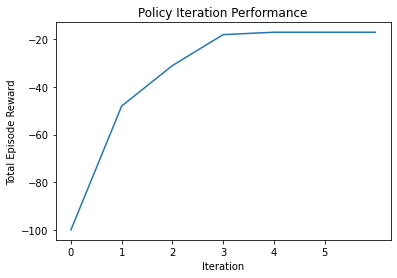

In [6]:
# Plot the results.
plt.plot(policy_iteration_rewards)
plt.title('Policy Iteration Performance')
plt.xticks(ticks=np.arange(0,iterations))
plt.xlabel('Iteration')
plt.ylabel('Total Episode Reward')
plt.show

### Value Iteration

In [7]:
# Define initial policy, P, as random (p(s,a) = 0.25 for all s).
P = np.ones([100, 4]) / 4

# Initialise V table.
V = np.zeros(100)

# Initialise iterations counter.
iterations = 0

value_iteration_rewards = []
value_iteration_finished = []
    
# Initialise 'stable' value in each state to check if value is optimised.
stable = np.zeros(100, dtype=bool)

for i in range(100):
    
    # Run an episode at the beginning of each loop using the current policy.
    # and calculate the total episode reward and percentage maze completions.
    
    if iterations == 0:
        print(f'==Running Initial Random Policy==')
    else:
        print(f'==Running Improved Policy==')
    
    # Initalise environment and other variables.
    state = env.reset()
    done = False
    counter = 0
    total_reward = 0
    
    # Limit episode to 100 steps (hoping to finish the task before limit).
    for step in range(100):
    
        # Get flattened current state.
        current_state = states[state[0],state[1]]
    
        # Select next action based on optimal policy.
        action = int(np.random.choice(np.flatnonzero(P[current_state] == P[current_state].max())))
    
        # Get state, reward and done variables from environment 'step' function.
        state, reward, done, info = env.step(action)
    
        # Update counter and reward tracking variables.
        counter += 1
        total_reward += reward
    
        # Display current location as agent moves through maze.
        print(f'\rStep: {counter} | Location: {state} | Reward: {reward}', end = '')
    
        # If we reach the goal, end the episode.
        if done:
            break
    
    # Create a variable for calculating and displaying 'Finished maze' statistics.
    if done:
        finished = 'Yes'
    else:
        finished = 'No'
    
    # Display run results.
    if iterations == 0:
        print(f'\rInitial Policy     | Total Reward: {total_reward} | '
              f'Finished Maze?: {finished}\n')
    else:
        print(f'\rIteration: {iterations} | Total Reward: {total_reward} | '
              f'Finished Maze?: {finished}\n')
    
    # Initialise delta and exit variables.
    delta = 0
    
    # Value iteration.
    for x in range(10):
        for y in range(10):
            
            # Get flattened current state.
            current_state = states[x, y]
         
            # Update v with current state value.
            v = V[current_state]
            
            # Get next action values at current state.
            Q = action_values((x,y))
            
            # Update state value with best action value.
            V[current_state] = np.max(Q)
            
            V[99] = 0
            
            # Caclulate change in value.
            delta = max(delta, np.abs(v - V[current_state]))
            
            # If the change is state value is sufficiently small, exit the loop.
            if delta < 0.1:
                stable[current_state] = True
            else:
                stable[current_state] = False
            
            # Update environment state to next in sweep.
            env.location = (x,y+1)
            if env.location[1] == 10:
                env.location = (x+1, 0)

    # Increment iteration counter and display progress indicator.
    iterations += 1
    
    # Update episode rewards and maze completions lists.
    value_iteration_rewards.append(total_reward)
    value_iteration_finished.append(finished)        
    
    if stable.all():
        # Print the results and exit the loop.
        print(f'\r==Value Iteration==                   \n'
              f'**Converged to optimal policy in {iterations} iterations**.\n')
        break
    
    else:
        print(f'\r==Value Iteration==                   \n'
              f'Iteration {iterations}.\n')
    
    # Define a deterministic policy, P, using the latest V table.
    print(f'==Policy Improvement==\n'
          f'Updated policy at each state to be greedy.\n')

    # Sweep through each state.
    for x in range(10):
        for y in range(10):
        
            # Get flattened current state.
            current_state = states[x,y]
       
            # Get next action values at current state.
            Q = action_values((x,y))
        
            # Select best action (argmax) based on optimised action values, breaking ties randomly.
            next_action = int(np.random.choice(np.flatnonzero(Q == Q.max())))
        
            # Update the policy at this state to be greedy for the best action.
            P[current_state] = np.eye(4)[next_action]
            
            # Update environment state to next in sweep.
            env.location = (x,y+1)
            if env.location[1] == 10:
                env.location = (x+1, 0)

# Run an episode with optimised policy.
print(f'==Running Optimised Policy==')
    
# Initalise environment and other variables.
state = env.reset()
done = False
counter = 0
total_reward = 0
    
# Limit episode to 100 steps (hoping to finish the task before limit).
for step in range(100):
    
    # Get flattened current state.
    current_state = states[state[0],state[1]]
    
    # Select next action based on optimal policy.
    action = int(np.random.choice(np.flatnonzero(P[current_state] == P[current_state].max())))
    
    # Get state, reward and done variables from environment 'step' function.
    state, reward, done, info = env.step(action)
    
    # Update counter and reward tracking variables.
    counter += 1
    total_reward += reward
    
    # Display current location as agent moves through maze.
    print(f'\rStep: {counter} | Location: {state} | Reward: {reward}', end = '')
  
    # If we reach the goal, end the episode.
    if done:
        break
    
# Create a variable for calculating and displaying 'Finished maze' statistics.
if done:
    finished = 'Yes'
else:
    finished = 'No'
    
# Display run results.
print(f'\rPolicy Iteration: {iterations} | Total Reward: {total_reward} | '
      f'Finished Maze?: {finished}\n')

# Update episode rewards and maze completions lists.
value_iteration_rewards.append(total_reward)
value_iteration_finished.append(finished)

print(f'Grid view of the state values:\n')
np.set_printoptions(precision = 2, suppress = True, linewidth = 100)
print(V.reshape([10,10]))

==Running Initial Random Policy==
Initial Policy     | Total Reward: -100 | Finished Maze?: No

==Value Iteration==                   
Iteration 1.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Iteration: 1 | Total Reward: -100 | Finished Maze?: No

==Value Iteration==                   
Iteration 2.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Iteration: 2 | Total Reward: -100 | Finished Maze?: No

==Value Iteration==                   
Iteration 3.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Iteration: 3 | Total Reward: -100 | Finished Maze?: No

==Value Iteration==                   
Iteration 4.

==Policy Improvement==
Updated policy at each state to be greedy.

==Running Improved Policy==
Iteration: 4 | Total Reward: -100 | Finished Maze?: No

==Value Iteration==                   
Iteration 5.

==Policy Improvement==
Updated poli

<function matplotlib.pyplot.show(close=None, block=None)>

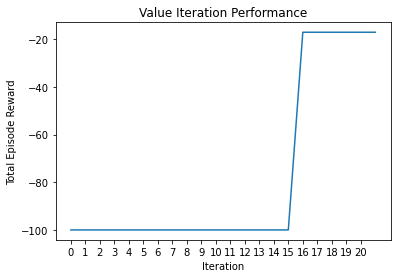

In [8]:
# Plot the results.
plt.plot(value_iteration_rewards)
plt.title('Value Iteration Performance')
plt.xlabel('Iteration')
plt.ylabel('Total Episode Reward')
plt.xticks(ticks=np.arange(0,iterations))
plt.show